# Car mileage prediction

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Assumptions of Linear regression 

#### 1.	Linearity  2.Homoskedasticity  3.No Autocorrelation 4.No_Multicollinearity  5.Normal Distribution of Independent Variables


In [2]:
df= pd.read_csv('data.csv')

In [3]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

# kmpl

In [6]:
df.rename(columns={'Kilometer_per_liter': 'kmpl'}, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D9B1BE340>]],
      dtype=object)

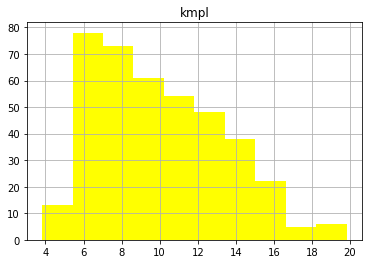

In [7]:
 df.hist(column='kmpl',color = "yellow")

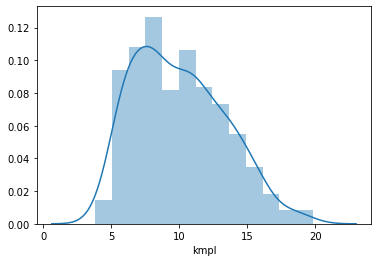

In [8]:
sns.distplot(df['kmpl'])

# origin

In [9]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

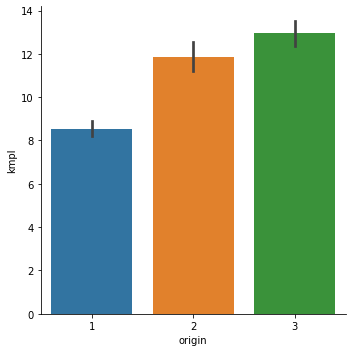

In [10]:
sns.factorplot(x='origin',y='kmpl', data=df, kind='bar')

# cylinders

In [11]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

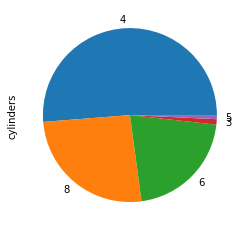

In [12]:
df['cylinders'].value_counts().plot(kind = 'pie')

# displacement

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D9B415A90>]],
      dtype=object)

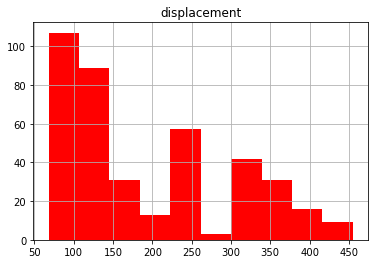

In [13]:
df.hist(column='displacement',color = "red")

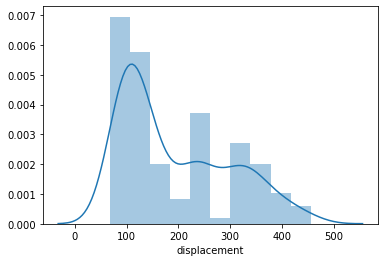

In [14]:
sns.distplot(df['displacement'])

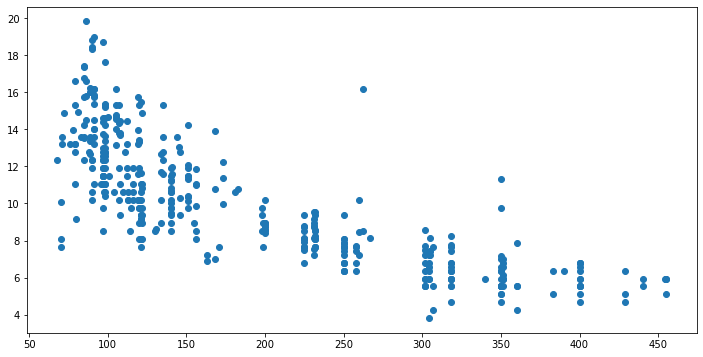

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['displacement'], df['kmpl'])
plt.show() # here we observe as displacement increases kmpl decreases

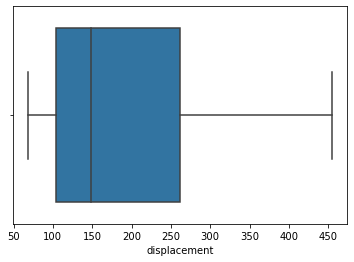

In [16]:
sns.boxplot(df['displacement'])

# horsepower

In [17]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [18]:
df['horsepower']= df['horsepower'].replace('?',np.nan) #replacing ? with np.nan

In [19]:
df['horsepower'].isnull().sum()

6

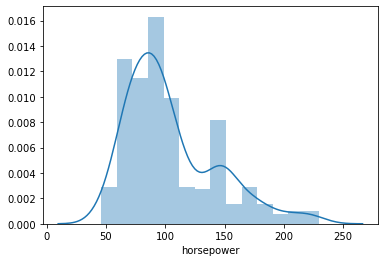

In [20]:
sns.distplot(df['horsepower'])

In [21]:
df['horsepower']=df['horsepower'].astype('float64')

In [22]:
df['horsepower']= df['horsepower'].fillna(df['horsepower'].median())

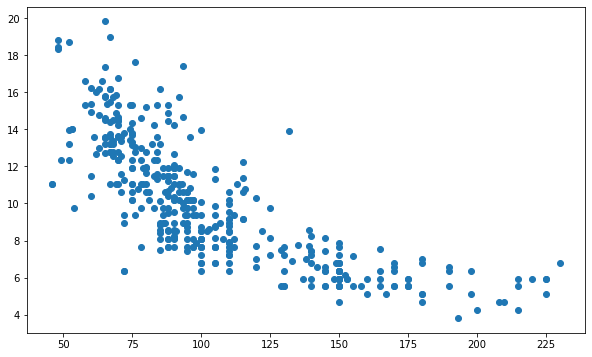

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['horsepower'], df['kmpl'])
plt.show() # On the x axis we have horse power we can observe as the horsepower increases kmpl decreases

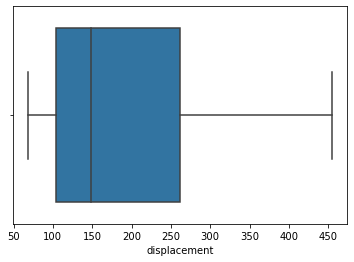

In [24]:
sns.boxplot(df['displacement'])

# weight

In [25]:
df['weight'].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

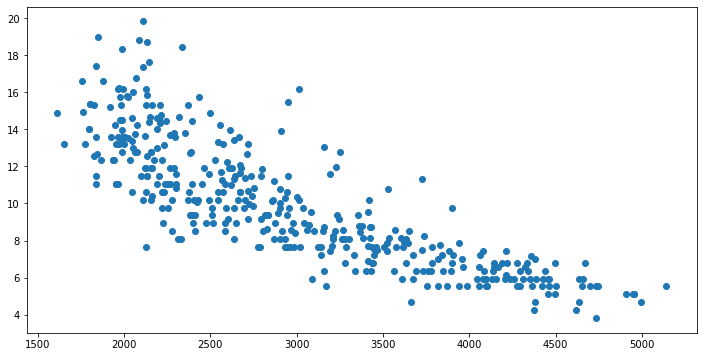

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['weight'], df['kmpl'])
plt.show() # Here we can observe as the weight increases kmpl decreases

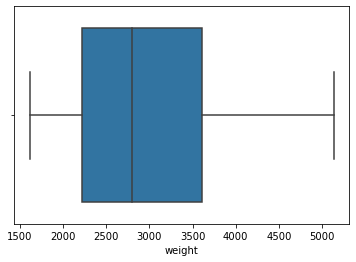

In [27]:
sns.boxplot(df['weight'])

# acceleration

In [28]:
df['acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

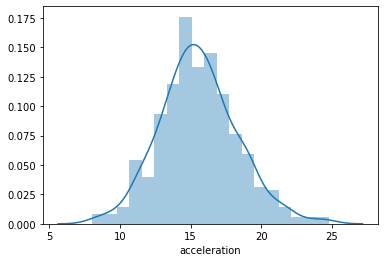

In [29]:
sns.distplot(df['acceleration'])

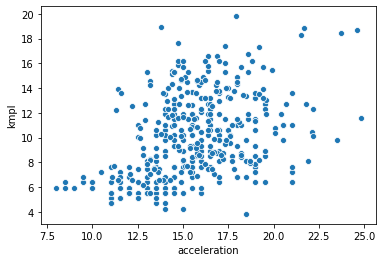

In [30]:
sns.scatterplot(x = 'acceleration', y = 'kmpl', data = df)

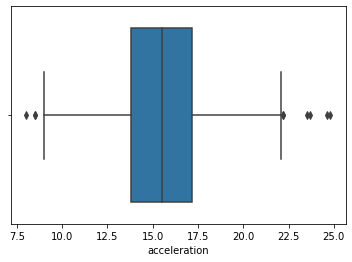

In [31]:
sns.boxplot(df['acceleration'])

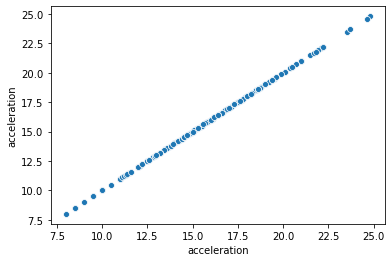

In [32]:
sns.scatterplot(x = 'acceleration', y = 'acceleration', data = df)

In [33]:
a = list(np.arange(0,1,0.01))
print(np.quantile(df.acceleration , a),'\n')
print('total elements -->',len(a))

[ 8.     9.485 10.    11.    11.    11.285 11.5   11.5   12.    12.
 12.    12.401 12.5   12.561 12.8   13.    13.    13.    13.2   13.2
 13.5   13.5   13.5   13.5   13.628 13.825 14.    14.    14.    14.
 14.2   14.307 14.4   14.5   14.5   14.5   14.5   14.5   14.5   14.7
 14.8   14.9   14.974 15.    15.    15.    15.162 15.3   15.4   15.5
 15.5   15.5   15.5   15.5   15.638 15.735 15.8   15.9   16.    16.
 16.    16.    16.2   16.4   16.4   16.5   16.5   16.5   16.5   16.693
 16.8   16.9   17.    17.    17.    17.175 17.3   17.4   17.5   17.6
 17.76  18.    18.    18.151 18.2   18.5   18.6   18.7   19.    19.
 19.    19.2   19.424 19.5   19.654 20.415 20.736 21.    21.806 22.239] 

total elements --> 100


In [34]:
# Here we observe that the outliers are not that much hence we can ignore them

# year

In [35]:
df['car_age'] = 2020 - df['year']

In [36]:
df.drop(['year'], axis=1, inplace= True)

# name

In [37]:
# It is not necessary for prediction of the mileage of the car

In [38]:
df.drop(['name'],axis= 1, inplace=True)

# origin

In [39]:
# It is not necessary for prediction of the mileage of the car

In [40]:
df.drop(['origin'],axis= 1, inplace=True)

## checking correlation with independent variables

In [41]:
df.corr()

,cylinders,displacement,horsepower,weight,acceleration,kmpl,car_age
cylinders,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.775396,0.348746
displacement,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.804203,0.370164
horsepower,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.773453,0.413733
weight,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.831741,0.306564
acceleration,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.420289,-0.288137
kmpl,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,1.000000,-0.579267
car_age,0.348746,0.370164,0.413733,0.306564,-0.288137,-0.579267,1.000000


In [42]:
df[df.columns].corr()['kmpl']

cylinders      -0.775396
displacement   -0.804203
horsepower     -0.773453
weight         -0.831741
acceleration    0.420289
kmpl            1.000000
car_age        -0.579267
Name: kmpl, dtype: float64

# Train test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x=df.drop(['kmpl'],axis=1)
y=df['kmpl']

In [45]:
x_train ,x_test ,y_train ,y_test = train_test_split (x,y , test_size = 0.2 , random_state = 47)

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [49]:
lpred=lm.predict(x_test)

In [50]:
mean_absolute_error(y_test,lpred)

1.0665917271920549

In [51]:
r2_score(y_test,lpred)

0.78933584540205

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [53]:
clf.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
pred = clf.predict(x_test)

In [55]:
mean_absolute_error(y_test,lpred)

1.0665917271920549

In [56]:
r2_score(y_test,lpred)

0.78933584540205